## Exploratory Data Analysis

The process of reviewing and cleaning data...

- derive insights
- generate hypotheses

#### Loading data using the panda package

In [21]:
import pandas as pd
import numpy as np

books = pd.read_csv('/Users/auroraxiao/Desktop/Data Science Project/DS-Projects/Data Set/clean_books.csv')

### Checking the missing data

In [22]:
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [23]:
books.isna().sum()

name      0
author    0
rating    0
year      0
genre     0
dtype: int64

### Strategies for addressing missing data:
- drop missing values 
    * 5% of less of total value


- Impute mean, median, or mode
    * Depends on the distribution and the context of the data


- Impute by sub-group
    * Different experience levels have different median salary



### Previously, i the python function chapter I learnt about the map() built in function. then I realized there is a .map() based on the code below:

``` 
Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(airline_prices))

# Check for missing values
print(planes.isna().sum()) ```

### Then what's the difference between these two?

In [24]:
## map() is a standalone function
## It's a built-in function that takes a function and an iterable:

numbers = [1, 2, 3]
doubled = list(map(lambda x:x * 2, numbers))

In [25]:
print(doubled)

[2, 4, 6]


In [26]:
### .map() in Python, it's likely from pandas DataFrames or Series:

import pandas as pd

# Series.map() - applies function to each element
series = pd.Series([1, 2, 3])
doubled = series.map(lambda x: x * 2)  # Series: [2, 4, 6]

## what the previous code example from the plane airline example was doing:
.map() 

it was trying to have a dictionary lookup:

it maps each value in the Series to a new value based on the mapping you provide

Input: Series of airline names

Mapping: airline_prices (which maps airline with median price)

output: Series of median prices corresponding to each airline


### Converting and analyzing categorical data

In [27]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [28]:
books.select_dtypes("object")

,name,author,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Childrens
...,...,...,...
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,Non Fiction
348,Wonder,R. J. Palacio,Fiction


#### Extracting value from categories

pandas.Series.str.contains()

In [29]:
books['genre'].head()

0    Non Fiction
1        Fiction
2    Non Fiction
3        Fiction
4      Childrens
Name: genre, dtype: object

In [30]:
books['genre'].str.contains('Fiction').head()

0     True
1     True
2     True
3     True
4    False
Name: genre, dtype: bool

### np.select() function and how it applies?

In [31]:
# Add a flight with unexpected format
planes = pd.DataFrame({
    'Flight': ['AA101', 'BA202', 'UA303'],
    'Duration': ['1h 30m', '45 minutes', '8h 20m']  # '45 minutes' won't match
})

# Define patterns for different flight types
short_flights = '1h|2h'      # 1 or 2 hours
medium_flights = '3h|4h|5h'  # 3, 4, or 5 hours
long_flights = '6h|7h|8h|9h|10h|11h|12h'  # 6+ hours

conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

choices = ['Short-haul', 'Medium-haul', 'Long-haul']

planes['Flight_Type'] = np.select(conditions, choices, default='Unknown')

print(planes)




  Flight    Duration Flight_Type
0  AA101      1h 30m  Short-haul
1  BA202  45 minutes     Unknown
2  UA303      8h 20m   Long-haul


#### Adding a summary statistics into a DataFrame

```
salary['std_dev'] = salary.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())
```

Step by step:

salary.groupby("Experience") - Groups rows by Experience level

["Salary_USD"] - Looks at the Salary_USD column within each group

.transform(lambda x: x.std()) - Calculates standard deviation for each group

What .transform() does:

It applies a function to each group
Crucially, it returns a result with the same shape as the original DataFrame
Each row gets the aggregated value for its group

#### Datetime Data Type

In [32]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

#### Practicing with loading Divorce data set

In [35]:
### loading the data with specific which columns are the date columns

## divorce_date,dob_man,dob_woman,marriage_date , with multiple date columns, one square bracket is enough
divorce = pd.read_csv('/Users/auroraxiao/Desktop/Data Science Project/DS-Projects/Data Set/divorce.csv', parse_dates = ["divorce_date","dob_man","dob_woman","marriage_date"])

In [36]:
divorce.head()


,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [37]:
divorce.dtypes ## therefore these columns are now in the datetime format

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

#### Using pd.to_datetime() to convert the column to Datatime data type

In [41]:
## if a column is not converted to datetime, with simple execution

divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

#### using month, date, year to collage / combine a date
divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])

- Converts multiple columns into datetime objects
- Takes separate columns (month, day, year) and combines them into a single datetime column
- Returns a new Series of datetime objects
- Example: If you have columns month=5, day=15, year=2020, it creates 2020-05-15

#### These all work:
pd.to_datetime(divorce[["month", "day", "year"]])

pd.to_datetime(divorce[["day", "month", "year"]])

pd.to_datetime(divorce[["year", "month", "day"]])

```
# If columns are named "m", "d", "y"
pd.to_datetime(divorce[["m", "d", "y"]].rename(columns={"m": "month", "d": "day", "y": "year"}))

# Or build a dictionary:
pd.to_datetime(divorce.assign(
    year=divorce["y"],
    month=divorce["m"],
    day=divorce["d"]
)[["year", "month", "day"]])
```

#### Using extract to get month, day, or year from the datetime data type

In [42]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month

In [43]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


.dt stands for datetime accessor - it's a special pandas attribute that lets you access datetime-specific properties and methods.
What .dt does:

- It's not converting anything
- It's a gateway to datetime operations on columns that are already datetime type
- Think of it like a toolbox that only opens when you have datetime data

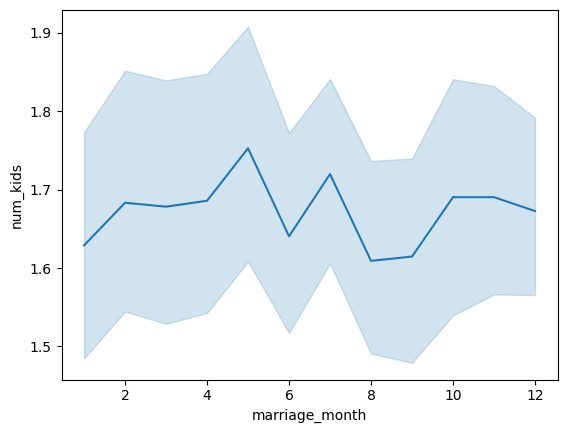

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data = divorce, x = "marriage_month", y = "num_kids")
plt.show()

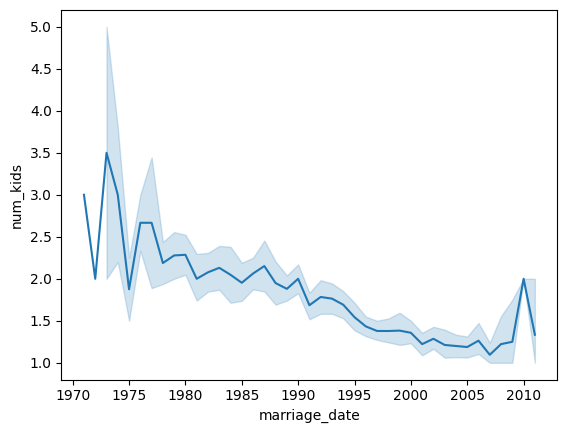

In [46]:
sns.lineplot(data = divorce, x = divorce.marriage_date.dt.year , y = "num_kids")
plt.show()

#### Correlation

#### to get the correlation of numeric columns only, you could add a parameter numberic_only

In [51]:
divorce.corr(numeric_only = True)

,income_man,income_woman,marriage_duration,num_kids,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000


In [56]:
divorce[["num_kids", "marriage_duration"]].corr()

,num_kids,marriage_duration
num_kids,1.000000,0.447358
marriage_duration,0.447358,1.000000


<Axes: >

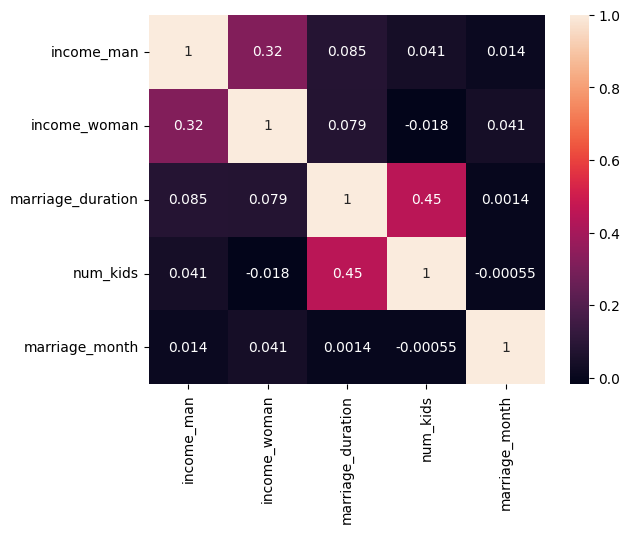

In [52]:
sns.heatmap(divorce.corr(numeric_only = True), annot = True)

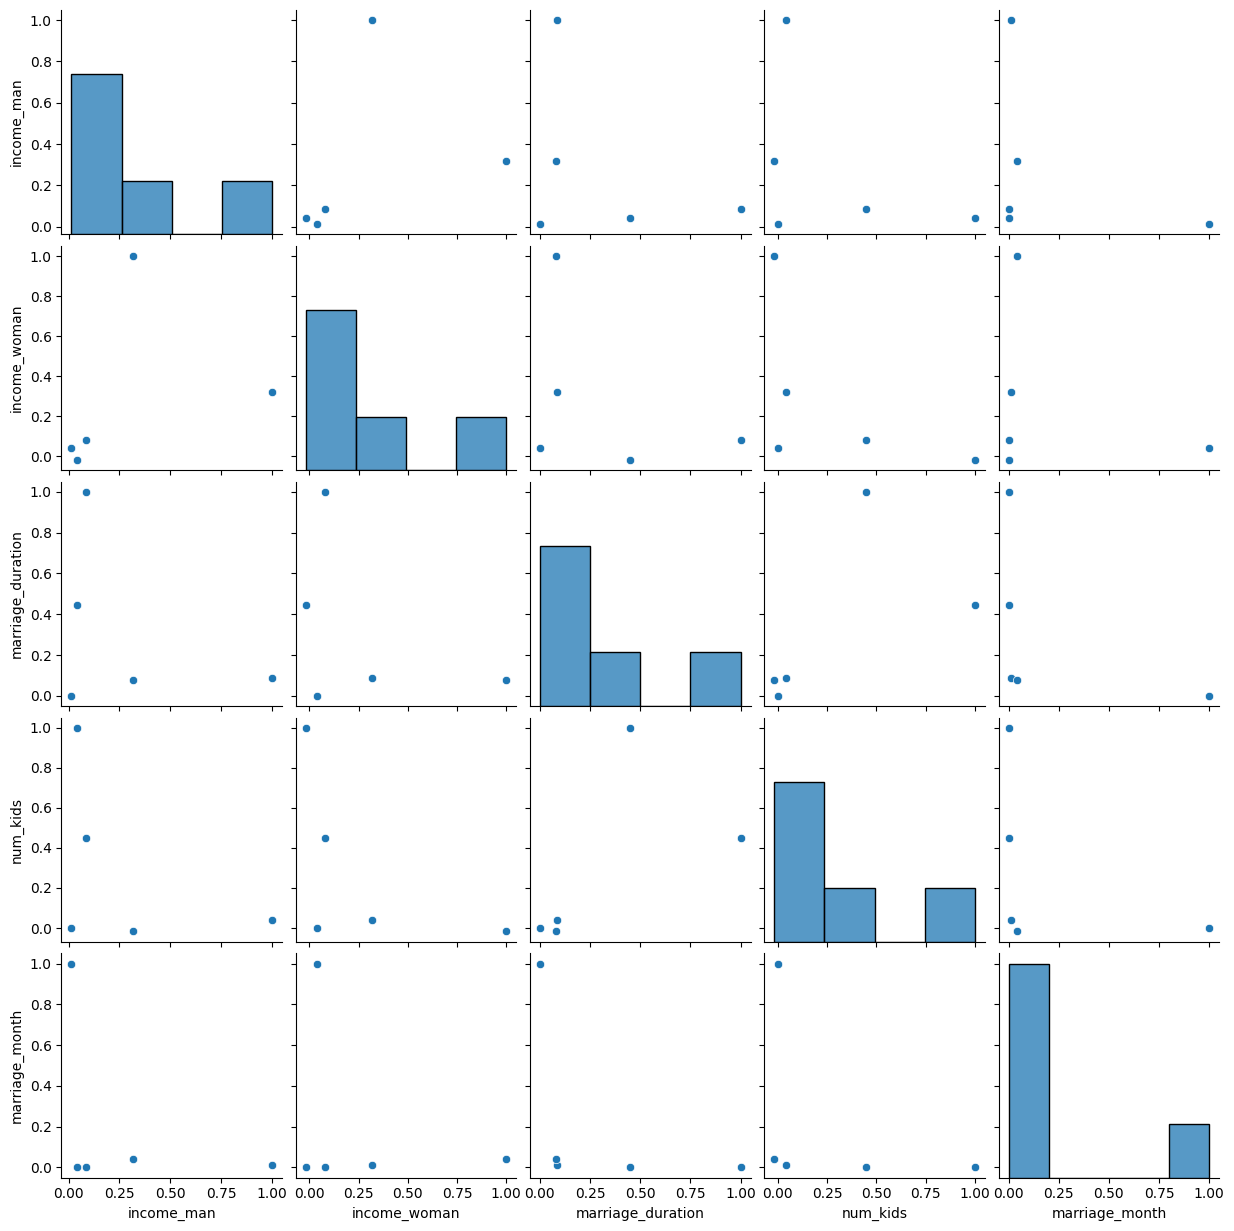

In [53]:
sns.pairplot(divorce.corr(numeric_only = True)) ### using vars = ["num_kids", "age_man"] to only specific columns in the pairplot

### Cross-tablulation

In [57]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


In [60]:
pd.crosstab(divorce["education_man"], divorce["education_woman"])

education_woman,Other,Preparatory,Primary,Professional,Secondary
education_man,,,,,
Other,0,0,0,2,1
Preparatory,0,189,10,232,70
Primary,0,27,30,14,29
Professional,1,155,6,1103,48
Secondary,1,84,18,82,103


In [61]:
## crosstub with tablulation of marriage month median
pd.crosstab(divorce["education_man"], divorce["education_woman"], values = divorce["marriage_month"], aggfunc = "median")

education_woman,Other,Preparatory,Primary,Professional,Secondary
education_man,,,,,
Other,NaN,NaN,NaN,8.5,7.0
Preparatory,NaN,7.0,8.5,7.0,7.0
Primary,NaN,5.0,7.0,7.5,5.0
Professional,1.0,7.0,9.5,7.0,6.0
Secondary,3.0,7.0,6.5,7.0,8.0


In [62]:
## crosstub with tablulation of num_kids median
pd.crosstab(divorce["education_man"], divorce["education_woman"], values = divorce["num_kids"], aggfunc = "median")

education_woman,Other,Preparatory,Primary,Professional,Secondary
education_man,,,,,
Other,NaN,NaN,NaN,2.0,NaN
Preparatory,NaN,1.0,2.0,1.0,2.0
Primary,NaN,2.0,2.0,2.0,2.0
Professional,2.0,2.0,2.0,2.0,2.0
Secondary,1.0,1.5,2.0,2.0,2.0


### Label & Bins for pd.cut()

please go to 20260215_LA_Crime.ipynb file to check it out

### KDE Distribution Plot

<Axes: xlabel='marriage_duration', ylabel='Density'>

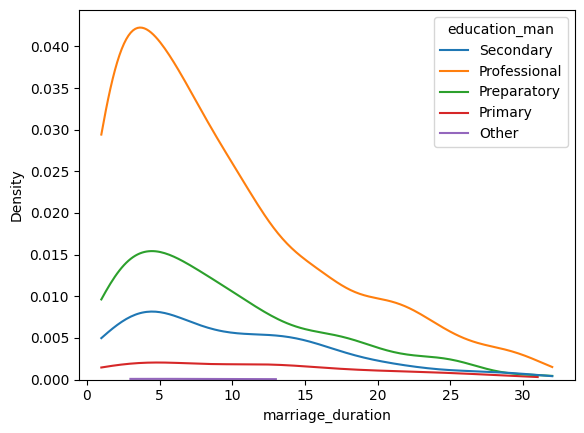

In [63]:
sns.kdeplot(data = divorce, x = "marriage_duration", hue = "education_man", cut = 0)